## **GET DATASET**

In [ ]:
# Example Simple Dataset
!wget https://download940.mediafire.com/nqiefe3gcofghGCqewMc66UQM7ORYEPCunmX3vndy4U-Ml0lngjAvRjJAvJB9JO9xM9d1UXqYvVkwFf7WcTClNjpHKLpZvxepxVYtyEAAxiymjE-45XBm8NRxrfitbfkfOrazdt7rMR9iBRxP9J1QSyIRtfp3-jyReg7gV9FGhN_55HZ/6uzdf0zfhbo73rk/KNN_blank.xlsx

In [1]:
# Iris Classification from UCI
!wget https://archive.ics.uci.edu/static/public/53/iris.zip

--2023-10-18 17:25:15--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-10-18 17:25:16 (654 MB/s) - ‘iris.zip’ saved [3738]



In [2]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


## **PREPARING REQUIREMENTS**

In [3]:
import numpy as np
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from mpl_toolkits.mplot3d import Axes3D
# from sklearn.metrics import accuracy_score

##### PREPARING DATAFRAME

In [4]:
# UCI Dataset
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv("iris.data", sep=',', names=cols)

# Example Dataset Sheet 1
# df = pd.read_excel("KNN_blank.xlsx").drop(columns=['No.'])

# Example Dataset Sheet 2 (Iris)
# cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
# df = pd.read_excel("KNN_blank.xlsx", sheet_name='Sheet2', names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### PLOTTING HISTOGRAM FROM DATAFRAME

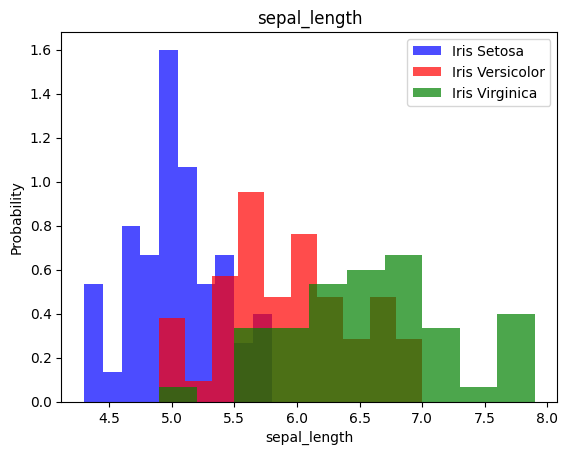

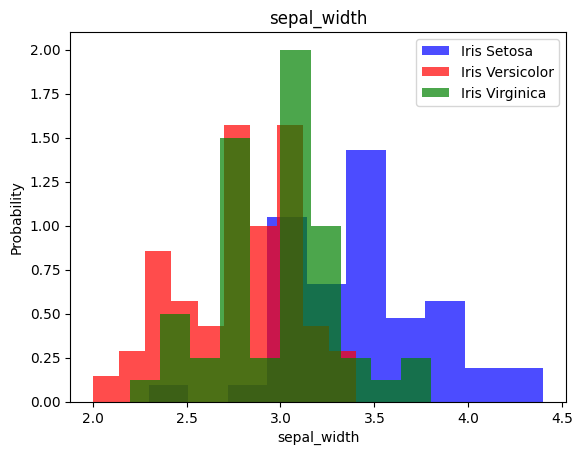

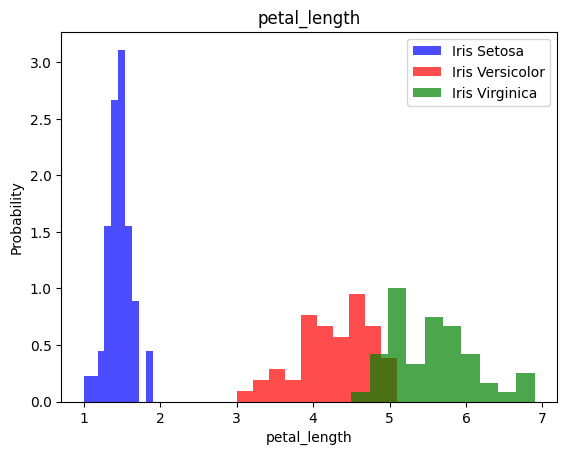

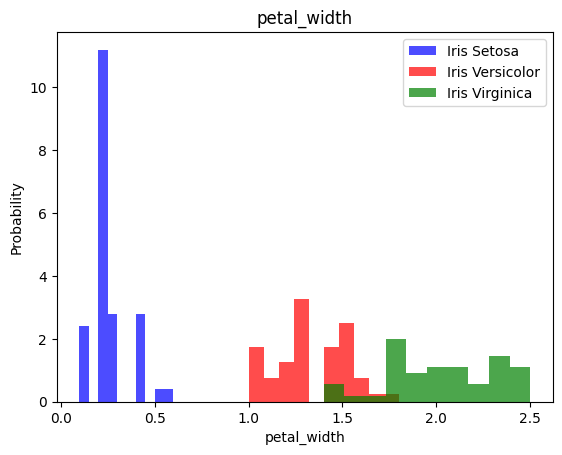

In [5]:
# UCI Dataset
for label in df.columns[:-1]:
  plt.hist(df[df["class"]=="Iris-setosa"][label], color='blue', label='Iris Setosa', alpha=0.7, density=True)
  plt.hist(df[df["class"]=="Iris-versicolor"][label], color='red', label='Iris Versicolor', alpha=0.7, density=True)
  plt.hist(df[df["class"]=="Iris-virginica"][label], color='green', label='Iris Virginica', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Example Dataset Sheet 1
for label in df.columns[:-1]:
  plt.hist(df[df["Y"]=="Jelek"][label], color='blue', label='Jelek', alpha=0.7, density=True)
  plt.hist(df[df["Y"]=="Baik"][label], color='red', label='Baik', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Example Dataset Sheet 2 (Iris)
for label in df.columns[:-1]:
  plt.hist(df[df["class"]=="Iris Sentosa"][label], color='blue', label='Iris Sentosa', alpha=0.7, density=True)
  plt.hist(df[df["class"]=="Iris Versicolor"][label], color='red', label='Iris Versicolor', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# finding all unique classes in label
pd.unique(df['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##### FINDING EUCLIDEAN DISTANCES

In [ ]:
# 2D Plot
# Example Dataset Sheet 1
data = df[df.columns[:-1]].values
point_of_interest = [7, 4]
distances = np.sqrt(np.sum((data - point_of_interest) ** 2, axis=1))

# find x index from nearest neighbor
k = 3
nearest_indices = np.argsort(distances)[:k]

# visualize data
plt.scatter(data[:, 0], data[:, 1], label='Data')
plt.scatter(point_of_interest[0], point_of_interest[1], color='red', marker='x', label='Point of Interest')

# visualize k's nearest neighbor in plot
for idx in nearest_indices:
    plt.annotate(f'Distance: {distances[idx]:.2f}', (data[idx, 0], data[idx, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Nearest Neighbors with Euclidean Distance')
plt.show()

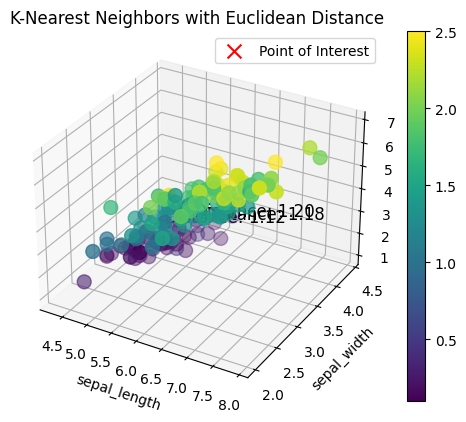

In [6]:
# 3D Plot
# Example Dataset Sheet 2 (Iris)
x = df['sepal_length'][:-1]
y = df['sepal_width'][:-1]
z = df['petal_length'][:-1]
c = df['petal_width'][:-1]
point_of_interest = [6.4, 3.2, 4, 0.2]
distances = np.sqrt((x - point_of_interest[0])**2 + (y - point_of_interest[1])**2 + (z - point_of_interest[2])**2 + (c - point_of_interest[3])**2)

# find x index from nearest neighbor
k = 3
nearest_indices = np.argsort(distances)[:k]

# visualize data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot using c variable with color
img = ax.scatter(x, y, z, c=c, cmap='viridis', marker='o', s=100)
fig.colorbar(img)

# visualize k's nearest neighbor
for idx in nearest_indices:
    ax.text(x[idx], y[idx], z[idx], f'Distance: {distances[idx]:.2f}', fontsize=12)

# visualize center plot
ax.scatter(point_of_interest[0], point_of_interest[1], point_of_interest[2], c='red', marker='x', s=100, label='Point of Interest')

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
ax.set_title('K-Nearest Neighbors with Euclidean Distance')
plt.legend()
plt.show()

## **PREPARING DATASET FOR TRAINING**

In [102]:
# 60% training data (random), 20% validation data, and 20% testing data
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# 100% training data
# train = df.copy()

In [103]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # using standard scaler
  # scaler = StandardScaler()
  # X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

## **TRAINING DATASET**

In [104]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [105]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
y_pred = knn_model.predict(X_test)

## **TESTING AND SCORE**

In [107]:
# print(classification_report(y_train, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [123]:
indeks_acak = random.sample(range(len(df)), 1)
data_acak = df.iloc[indeks_acak]
X = data_acak[data_acak.columns[:-1]].values
predik = knn_model.predict(X)
print(data_acak)
print("Prediction:", predik)

    sepal_length  sepal_width  petal_length  petal_width            class
72           6.3          2.5           4.9          1.5  Iris-versicolor
Hasil Prediksi: ['Iris-versicolor']
